<h1>human organ classification </h1>
<h2> C-NN model<h3> [transfer learn on MobileNetV2 model]</h3></h2>

call to packages & libraries

In [11]:

from tensorflow import keras
from datetime import datetime

from src.sup.evaluation import *
from src.sup.support import *
from src.sup.test_set_eval import *

from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model

In [12]:
model_name = "end_to_end_1.1"

# Load the TensorBoard notebook extension.
%load_ext tensorboard

# call inline plt.

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/

callout dataset

In [13]:
classes = ['Heart','Brain','Eye','Kidney','Skull','Other']
root_dir = '../../datasets/'
train_dir = os.path.join(root_dir,'train/')
validation_dir = os.path.join(root_dir,'validation/')
tr_heart_dir,tr_brain_dir,tr_eye_dir,tr_kidney_dir,tr_skull_dir,tr_other_dir = path_update(train_dir,classes)
vl_heart_dir,vl_brain_dir,vl_eye_dir,vl_kidney_dir,vl_skull_dir,vl_other_dir = path_update(validation_dir,classes)

take a glance at training dataset

In [ ]:
plot_sample_of_img(4,4,os.listdir(tr_heart_dir)+os.listdir(tr_eye_dir))

ImageGenator - autolabelling, and categorizing.

In [14]:
train_gen_tmp = ImageDataGenerator(rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_gen_tmp = ImageDataGenerator(rescale=1/225.)

train_gen = train_gen_tmp.flow_from_directory(train_dir,
                                              target_size=(150,150),
                                              color_mode="grayscale",
                                              class_mode='categorical',
                                              batch_size= 20,
                                              shuffle=True,
                                              seed=42)

validation_gen = validation_gen_tmp.flow_from_directory(validation_dir,
                                              target_size=(150,150),
                                              color_mode="grayscale",
                                              class_mode='categorical',
                                              batch_size= 20,
                                              shuffle=True,
                                              seed=42)

STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=validation_gen.n//validation_gen.batch_size

clToInt_dict = train_gen.class_indices
clToInt_dict = dict((k,v) for v,k in clToInt_dict.items())

Found 2803 images belonging to 6 classes.
Found 247 images belonging to 6 classes.


define the model

In [15]:
model = tf.keras.models.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(224,224,1)),
    MaxPool2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dense(6,activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 346112)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [16]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(6, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 64)      640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 165888)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               21233792  
_________________________________________________________________
dense_5 (Dense)              (None, 6)                

compile the model

In [17]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

save the log

In [18]:
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")+'/'

if not os.path.exists(logdir):
    os.mkdir(logdir)

#print(datetime.now().strftime("%Y%m%d%H%M%S"))
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, profile_batch = 100000000)

fit & train the model.

In [19]:
history = model.fit(train_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_gen,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,
                    verbose=1,
                    callbacks= [tensorboard_callback])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 140 steps, validate for 12 steps
Epoch 1/50
140/140 [==============================] - 17s 118ms/step - loss: 1.7663 - accuracy: 0.3125 - val_loss: 1.7276 - val_accuracy: 0.3500

visualize layer process in cnn

In [ ]:
#visualize_model(model,img_path)

instant evaluation

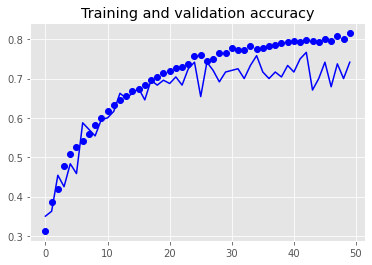

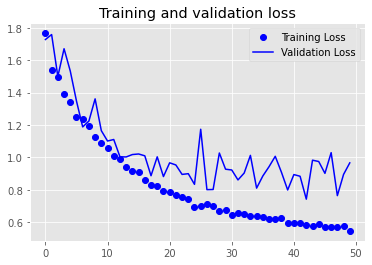

In [21]:
#call to the tensorboard
#%tensorboard --logdir ./logs/fit/
#look at training model performance
acc_n_loss(history)

#model.evaluate_generator(validation_gen,
#                         steps=STEP_SIZE_VALID)

evaluate the model on test set.


In [ ]:
model_path = '../../h5_files/models/20200816005012mobileNet_v2_transfer_learn.h5'
model_weight_path = '../../h5_files/weights/20200816005012mobileNet_v2_transfer_learn.h5'

model = load_model(model_path)
model.load_weights(model_weight_path)
y_pred,y_test = test_eval(model,classes)
plot_confusion_metrix(y_test,y_pred,classes)
ROC_classes(6,y_test,y_pred,classes)



 save the model in .h5 file

In [20]:
model_path,model_weight_path = save(model,datetime.now().strftime("%Y%m%d%H%M%S")+model_name+'.h5')

make prediction on random images

In [ ]:
model_path = '../../h5_files/models/20200816005012mobileNet_v2_transfer_learn.h5'
model_weight_path = '../../h5_files/weights/20200816005012mobileNet_v2_transfer_learn.h5'
img_path = '../../datasets/validation/../../datasets/validation/Other/11.jpg'
rnd_predict(model_path,model_weight_path,img_path,clToInt_dict)